In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Data loading
file_path = Path("./Resources/myopia.csv")
myopia = pd.read_csv(file_path)
myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [4]:
X= myopia.drop("MYOPIC", axis =1)
X.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Standarize data with StandarScaler
scaled_myopia = StandardScaler().fit_transform(X[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR']])
# X_scaled['MOMMY'] = myopia['MOMMY']
# X_scaled['DADMY'] = myopia['DADMY']
# print(X_scaled[0:12])

In [6]:
X_scaled = pd.DataFrame(scaled_myopia, columns = myopia.columns[:12])
X_scaled['MOMMY'] = myopia['MOMMY']
X_scaled['DADMY'] = myopia['DADMY']


In [7]:
X_scaled

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,1,0
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,1,1
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,1
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,0,0


In [8]:
# Part 2
# Perfrom dimensionality reduciton with PCA

# Initialize PCA model
pca = PCA(n_components=0.9)

X_pca=pca.fit_transform(X_scaled)


# myopia_pca = pca.fit_transform(myopia_scaled)

# myopia_df_pca = pd.DataFrame(
#     data=myopia_pca, columns=["principal component 1", "principal component 2"]
# )
# myopia_df_pca.head()

In [9]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(X_pca)

C:\Users\colle\anaconda36\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


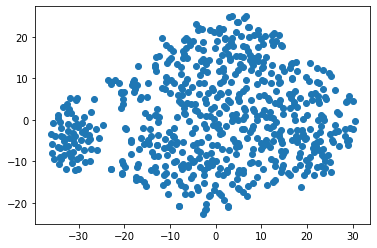

In [10]:
# Plot the results
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

In [11]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [12]:
clusters = get_clusters(3, X)

In [13]:
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,2
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,2
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,2


In [16]:
def show_clusters(df):
    plt.scatter(transformed_features[:,0], transformed_features[:,1], c=df['class'])
    plt.show()

In [18]:
#Create an elbow plot to identify the best number of clusters

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\colle\anaconda36\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7091.966245
1,2,5938.640254
2,3,5173.168217
3,4,4811.269180
4,5,4536.128074


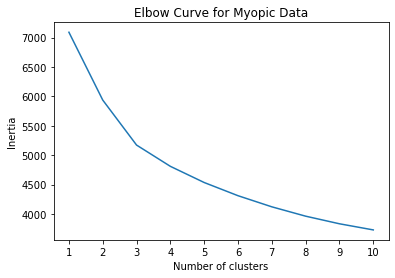

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Myopic Data')
plt.show()

 In the elbow curve above, the K value appears at 3. 

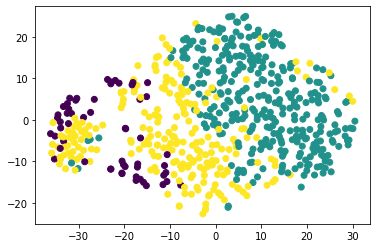

In [21]:
show_clusters(clusters)

Patients can be clustered to determine their relationship with the data provided. The K-means analysis determines that three cluster groups would best represent this data. 